<a href="https://colab.research.google.com/github/10erick-cpu/Entregas/blob/main/TP2/02_Espacios_Crom%C3%A1ticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo Practico II**

## **Primera Parte**

*  La propuesta para esta actividad consiste en manipular independientemente la luminancia y la saturación de una imagen. Para ello convertimos cada pixel de la imagen del espacio RGB al espacio YIQ, luego alteramos los valores de Y (para cambiar la luminancia) y/o de IQ (para cambiar la saturación). Con los nuevos valores de YIQ, convertimos a RGB nuevamente y obtenemos una nueva imagen.

**Observaciones**: para cada uno estos deben mostrar la imagen original vs el resultado de la modificación realizada a la imagen para un diferente rango de valores de prueba de Y e IQ.

## **Segunda Parte**


*   La segunda parte del TP2 consiste en utilizar algunos datasets 2D (pueden ser mapas de altitud, de temperatura, etc.) y “visualizarlos” con diferentes paletas, incluyendo la de niveles de gris y la arco iris.







### **Alumno** : Erick Macote Yparraguirre
### **mail** : leonelerick59@gmail.com
### **Profesor** : Steven Martinez Vargas


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Librerias Usadas**

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import imageio as io
from PIL import Image

In [3]:
!ls

drive  joaquin.jpeg  sample_data  Temperature_map.png


# **Primera Parte**

# **Función para leer la imágen y mostrarla**

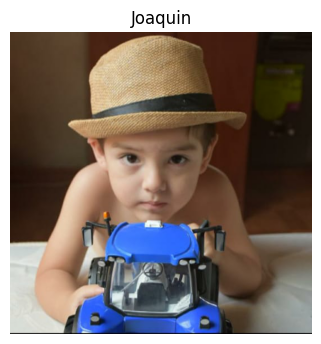

In [4]:
path="/content/joaquin.jpeg"

def get_image(path):
  im = io.imread(path)
  im = im.astype(np.int)
  return im

imagen = get_image(path)


def plot_image(im, title, cmap=None):
  fig, ax = plt.subplots(dpi=100)
  ax.imshow(im, cmap=cmap)
  ax.set_title(title)
  plt.axis('off')
  plt.show()

plot_image(imagen,'Joaquin')


## **Valores de RGB normalizados entre [0,1]**

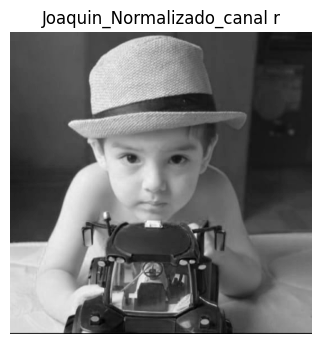

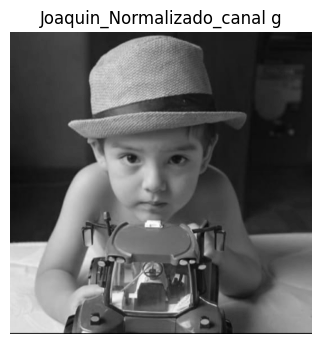

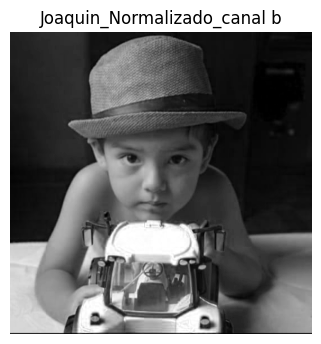

In [5]:
def image_to_rgb(im):
  r = im[:,:,0]
  g = im[:,:,1]
  b = im[:,:,2]
  return r, g, b

r,g,b= image_to_rgb(imagen/255.0)  # Normalizado [0,1]

# print(r)
# print(g)
# print(b)

# Graficamos los canales de la imagen normalizada

plot_image(r,'Joaquin_Normalizado_canal r', cmap='gray')
plot_image(g,'Joaquin_Normalizado_canal g', cmap='gray')
plot_image(b,'Joaquin_Normalizado_canal b', cmap='gray')


# Opción adicional de Ploteo

# plt.figure(figsize=(20,20))
# plt.subplot(131)
# plt.imshow(r)
# plt.title('Joaquin_Normalizado_canal r'),plt.axis('off') 

# plt.figure(figsize=(20,20))
# plt.subplot(132)
# plt.imshow(g)
# plt.title('Joaquin_Normalizado_canal g'),plt.axis('off') 

# plt.figure(figsize=(20,20))
# plt.subplot(133)
# plt.imshow(b)
# plt.title('Joaquin_Normalizado_canal b'),plt.axis('off') 

# plt.show()




#**Convertimos cada pixel de la imagen del espacio RGB al espacio YIQ - Sistema Lineal**

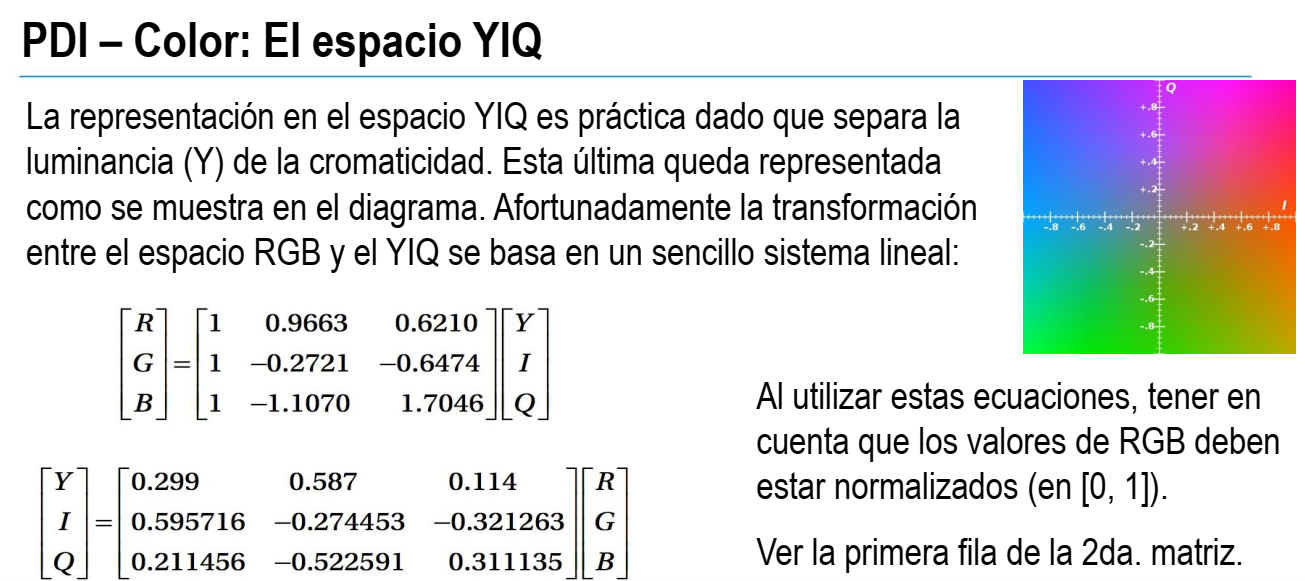

## **Función para convertir cada pixel de la imagen del espacio RGB al espacio YIQ**

[[0.22037255 0.22037255 0.22037255 ... 0.05258431 0.05258431 0.05258431]
 [0.22037255 0.22037255 0.22037255 ... 0.06042745 0.06042745 0.06042745]
 [0.22037255 0.22037255 0.22037255 ... 0.07219216 0.07219216 0.07219216]
 ...
 [0.86600784 0.86600784 0.86208627 ... 0.62041569 0.62041569 0.62041569]
 [0.37973333 0.37973333 0.37581176 ... 0.27923922 0.27923922 0.27923922]
 [0.00460392 0.00230196 0.00230196 ... 0.00319608 0.00319608 0.00319608]] [[ 0.08360063  0.08360063  0.08360063 ...  0.02391212  0.02391212
   0.02391212]
 [ 0.08360063  0.08360063  0.08360063 ...  0.02391212  0.02391212
   0.02391212]
 [ 0.08360063  0.08360063  0.08360063 ...  0.02391212  0.02391212
   0.02391212]
 ...
 [ 0.00162699  0.00162699  0.00162699 ... -0.01401685 -0.01401685
  -0.01401685]
 [ 0.00162699  0.00162699  0.00162699 ... -0.01401685 -0.01401685
  -0.01401685]
 [-0.00215257 -0.00107629 -0.00107629 ... -0.003596   -0.003596
  -0.003596  ]] [[-0.00367176 -0.00367176 -0.00367176 ... -0.00151615 -0.00151615


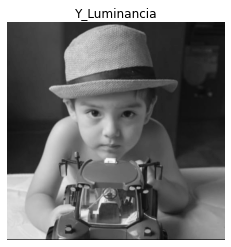

In [30]:

def trans_rgb_to_yiq(r,g,b):
    Y= 0.299*r + 0.587*g + 0.114*b
    I= 0.595716*r + -0.274453*g + -0.321263*b
    Q= 0.211456*r + -0.522591*g + 0.311135*b 
    return Y,I,Q
   
Y,I,Q = trans_rgb_to_yiq(r,g,b)


Y_Luminancia= np.array(Y)
print(Y_Luminancia)

I_sat= np.array(I)
print(I_sat)

Q_sat= np.array(Q) 
print(Q_sat)


# print(Y)
# print(I)
# print(Q)




plt.imshow(Y_Luminancia,cmap='gray')
plt.title('Y_Luminancia'),plt.axis('off')
plt.axis('off')


plt.show()


# **Alteración de los valores de Y (Para cambiar la Luminancia)**

[[0.08814902 0.08814902 0.08814902 ... 0.02103373 0.02103373 0.02103373]
 [0.08814902 0.08814902 0.08814902 ... 0.02417098 0.02417098 0.02417098]
 [0.08814902 0.08814902 0.08814902 ... 0.02887686 0.02887686 0.02887686]
 ...
 [0.34640314 0.34640314 0.34483451 ... 0.24816627 0.24816627 0.24816627]
 [0.15189333 0.15189333 0.15032471 ... 0.11169569 0.11169569 0.11169569]
 [0.00184157 0.00092078 0.00092078 ... 0.00127843 0.00127843 0.00127843]]
[[0.15426078 0.15426078 0.15426078 ... 0.03680902 0.03680902 0.03680902]
 [0.15426078 0.15426078 0.15426078 ... 0.04229922 0.04229922 0.04229922]
 [0.15426078 0.15426078 0.15426078 ... 0.05053451 0.05053451 0.05053451]
 ...
 [0.60620549 0.60620549 0.60346039 ... 0.43429098 0.43429098 0.43429098]
 [0.26581333 0.26581333 0.26306824 ... 0.19546745 0.19546745 0.19546745]
 [0.00322275 0.00161137 0.00161137 ... 0.00223725 0.00223725 0.00223725]]
0.3991058823529412
0.6984352941176469


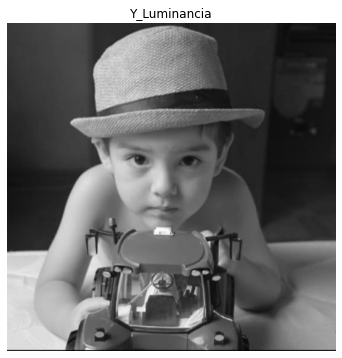

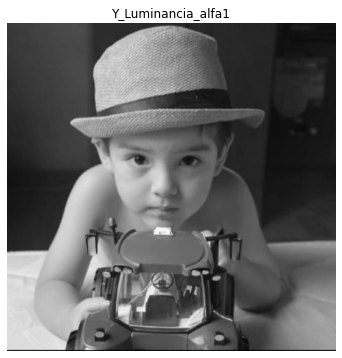

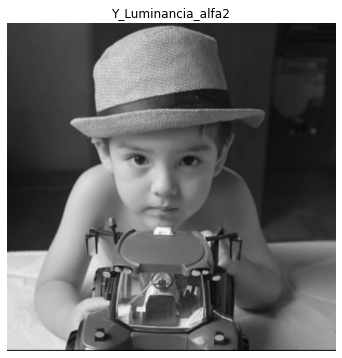

In [8]:
#### Alfa = Coefieciente de Luminancia #####

alfa1 = 0.4
alfa2 = 0.7

######  Nuevos valores de Y en función de coeficiente de Luminancia ######

Y_prima1 = alfa1  * Y_Luminancia
Y_prima2 = alfa2  * Y_Luminancia


print(Y_prima1)

print(Y_prima2)

#######  Verificamos que Y_Prima <= 1  ############

maxValue1 = np.amax(Y_prima1)
print(maxValue1)

maxValue2 = np.amax(Y_prima2)
print(maxValue2)

##### Graficamos #####

plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(Y_Luminancia,cmap='gray')
plt.title('Y_Luminancia'),plt.axis('off')


plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(Y_prima1,cmap='gray')
plt.title('Y_Luminancia_alfa1'),plt.axis('off')

plt.figure(figsize=(20,20))
plt.subplot(133)
plt.imshow(Y_prima2,cmap='gray')
plt.title('Y_Luminancia_alfa2'),plt.axis('off')

plt.show()




**Alteración de los valores de IQ (Para cambiar la Saturacion)**

[[ 0.04180031  0.04180031  0.04180031 ...  0.01195606  0.01195606
   0.01195606]
 [ 0.04180031  0.04180031  0.04180031 ...  0.01195606  0.01195606
   0.01195606]
 [ 0.04180031  0.04180031  0.04180031 ...  0.01195606  0.01195606
   0.01195606]
 ...
 [ 0.0008135   0.0008135   0.0008135  ... -0.00700842 -0.00700842
  -0.00700842]
 [ 0.0008135   0.0008135   0.0008135  ... -0.00700842 -0.00700842
  -0.00700842]
 [-0.00107629 -0.00053814 -0.00053814 ... -0.001798   -0.001798
  -0.001798  ]]
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -0. -0. -0.]
 [ 0.  0.  0. ... -0. -0. -0.]
 [-0. -0. -0. ... -0. -0. -0.]]
0.22574681960784315
0.0


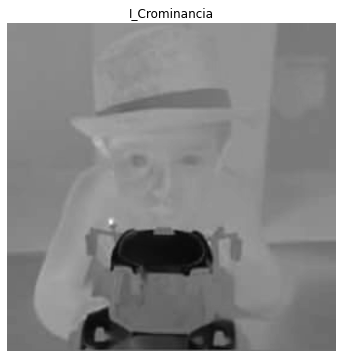

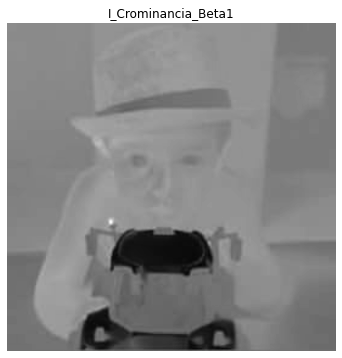

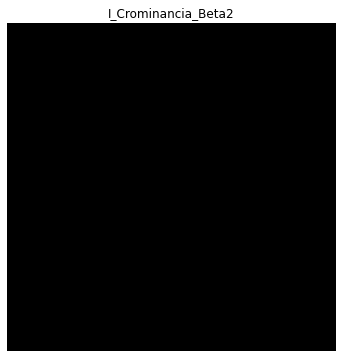

In [ ]:
#### Beta = Coefieciente de Saturación #####

Beta1 = 0.5
Beta2 = 0.0

######  Nuevos valores de I en función de Coefieciente de Saturación ######

I_prima1 = Beta1  * I_sat
I_prima2 = Beta2  * I_sat

print(I_prima1)

print(I_prima2)

#######  Verificamos que -0.5957 < I_prima < 0.5957 ############

maxValue3 = np.amax(I_prima1)
print(maxValue3)

maxValue4 = np.amax(I_prima2)
print(maxValue4)


###### Graficamos ######

plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(I_sat,cmap='gray')
plt.title('I_Crominancia'),plt.axis('off')


plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(I_prima1,cmap='gray')
plt.title('I_Crominancia_Beta1'),plt.axis('off')

plt.figure(figsize=(20,20))
plt.subplot(133)
plt.imshow(I_prima2,cmap='gray')
plt.title('I_Crominancia_Beta2'),plt.axis('off')

plt.show()



[[-0.00440612 -0.00440612 -0.00440612 ... -0.00181938 -0.00181938
  -0.00181938]
 [-0.00440612 -0.00440612 -0.00440612 ... -0.00181938 -0.00181938
  -0.00181938]
 [-0.00440612 -0.00440612 -0.00440612 ... -0.00181938 -0.00181938
  -0.00181938]
 ...
 [-0.009311   -0.009311   -0.009311   ... -0.00597052 -0.00597052
  -0.00597052]
 [-0.009311   -0.009311   -0.009311   ... -0.00597052 -0.00597052
  -0.00597052]
 [-0.0049185  -0.00245925 -0.00245925 ...  0.00046908  0.00046908
   0.00046908]]
[[-0.00550765 -0.00550765 -0.00550765 ... -0.00227422 -0.00227422
  -0.00227422]
 [-0.00550765 -0.00550765 -0.00550765 ... -0.00227422 -0.00227422
  -0.00227422]
 [-0.00550765 -0.00550765 -0.00550765 ... -0.00227422 -0.00227422
  -0.00227422]
 ...
 [-0.01163875 -0.01163875 -0.01163875 ... -0.00746315 -0.00746315
  -0.00746315]
 [-0.01163875 -0.01163875 -0.01163875 ... -0.00746315 -0.00746315
  -0.00746315]
 [-0.00614813 -0.00307406 -0.00307406 ...  0.00058635  0.00058635
   0.00058635]]
0.21952446588235

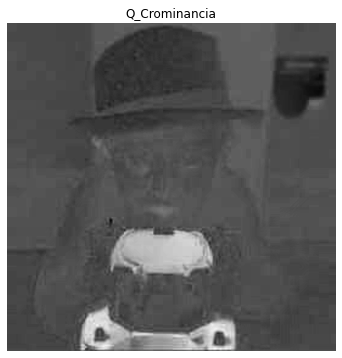

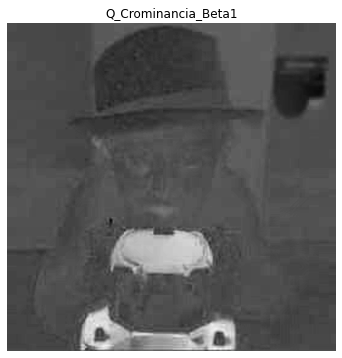

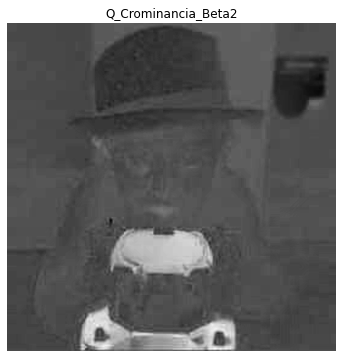

In [9]:
#### Beta = Coefieciente de Saturación #####

Beta3 = 1.2
Beta4 = 1.5

######  Nuevos valores de Q en función de Coefieciente de Saturación ######

Q_prima1 = Beta3  * Q_sat
Q_prima2 = Beta4  * Q_sat

print(Q_prima1)

print(Q_prima2)

#######  Verificamos que -0.5957 < I_prima < 0.5957 ############

maxValue4 = np.amax(Q_prima1)
print(maxValue4)

maxValue5 = np.amax(Q_prima2)
print(maxValue5)


###### Graficamos ######

plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(Q_sat,cmap='gray')
plt.title('Q_Crominancia'),plt.axis('off')


plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(Q_prima1,cmap='gray')
plt.title('Q_Crominancia_Beta1'),plt.axis('off')

plt.figure(figsize=(20,20))
plt.subplot(133)
plt.imshow(Q_prima2,cmap='gray')
plt.title('Q_Crominancia_Beta2'),plt.axis('off')

plt.show()


### https://www.it-swarm-es.com/es/python/como-limitar-un-numero-para-estar-dentro-de-un-rango-especificado-piton/972747741/

# Con los nuevos valores de YIQ, convertimos a RGB nuevamente 

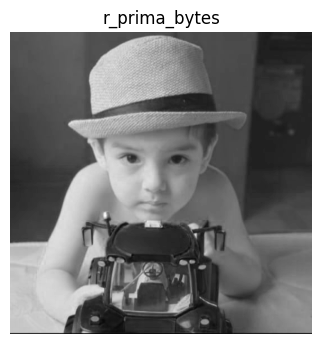

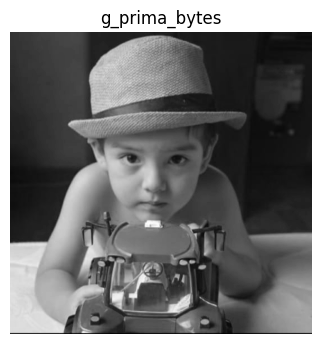

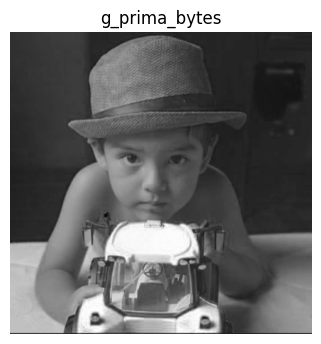

In [67]:
#### Alfa = Coefieciente de Luminancia #####
alfa1 = 0.4

######  Nuevos valores de Y en función de coeficiente de Luminancia ######
Y_prima1 = alfa1  * Y_Luminancia

#### Beta = Coefieciente de Saturación #####

Beta1 = 0.5

######  Nuevos valores de I en función de Coefieciente de Saturación ######

I_prima1 = Beta1  * I_sat

# print(I_prima1)

######  Nuevos valores de Q en función de Coefieciente de Saturación ######

Q_prima1 = Beta1  * Q_sat

# print(Q_prima1)

### Planteamos la Funcion de transformación ###

def trans_yiq_prima_to_rgb_prima(Y_prima1,I_prima1,Q_prima1):
    r_prima= 1*Y_prima1 + 0.9663*I_prima1 + 0.6210*Q_prima1
    g_prima= 1*Y_prima1 + -0.2721*I_prima1 + -0.6474*Q_prima1
    b_prima= 1*Y_prima1 + -1.1070*I_prima1 + 1.7046*Q_prima1 
    return r_prima,g_prima,b_prima
   
r_prima,g_prima,b_prima=trans_yiq_prima_to_rgb_prima(Y_prima1,I_prima1,Q_prima1)

##### Convertimos R'G'B' a bytes (*255) y graficamos por canales #####

r_prima_bytes =r_prima*255

r_prima_bytes

g_prima_bytes =g_prima*255

g_prima_bytes

b_prima_bytes =b_prima*255

b_prima_bytes

plot_image(r_prima_bytes,'r_prima_bytes', cmap='gray')
plot_image(g_prima_bytes,'g_prima_bytes', cmap='gray')
plot_image(b_prima_bytes,'g_prima_bytes', cmap='gray')


# **Segunda Parte**

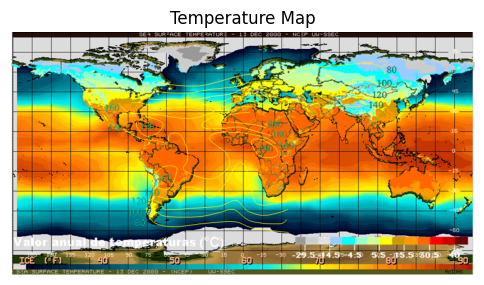

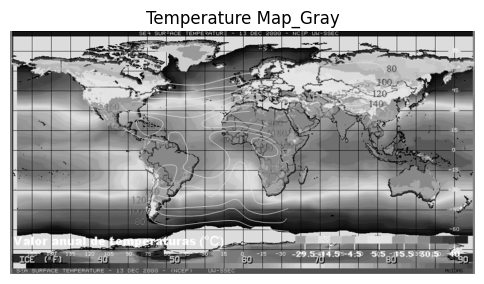

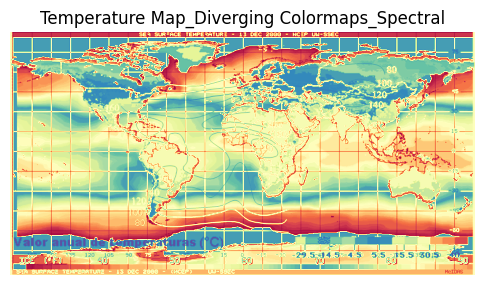

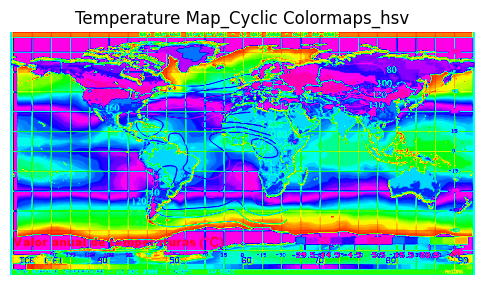

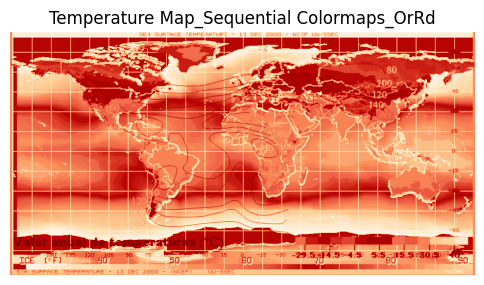

In [ ]:
path="/content/Temperature_map.png"

def get_image(path):
  im = io.imread(path)
  im = im.astype(np.int)
  return im

imagen_temperature = get_image(path)


def plot_image(im, title, cmap=None):
  fig, ax = plt.subplots(dpi=100)
  ax.imshow(im, cmap=cmap)
  ax.set_title(title)
  plt.axis('off')
  plt.show()

plot_image(imagen_temperature,'Temperature Map')


def imagen_to_rgb(im):
  r = im[:,:,0]
  g = im[:,:,1]
  b = im[:,:,2]
  return r, g, b

r,g,b= imagen_to_rgb(imagen_temperature )

# print(r,g,b)


######  Convertimos la imagen RGB a escala grises (Luminancia 'Y')  ######

im_gray = 0.299*r + 0.587*g + 0.114*b
plot_image(im_gray,'Temperature Map_Gray', cmap='gray')


##### Usamos diferentes Paletas de Colores #####

## https://matplotlib.org/stable/tutorials/colors/colormaps.html ###


plot_image(im_gray,'Temperature Map_Diverging Colormaps_Spectral', cmap='Spectral')
plot_image(im_gray,'Temperature Map_Cyclic Colormaps_hsv', cmap='hsv')
plot_image(im_gray,'Temperature Map_Sequential Colormaps_OrRd', cmap='OrRd')



# **Algunas Conclusiones**

En esta parte se seleccionó un mapa de temperaturas de superficie de mar y se visualizó la misma con distintas paletas incluyendo la de niveles de gris, con la finalidad de apreciar ciertos detalles que se comentan a continuación:
En primera instancia, se muestra la imagen en escala de grises (mapa de bits) desprovisto en su totalidad de la cromaticidad, no se apreciará un cambio en la apariencia al modificar el brillo (Luminancia). 

Esta escala es la representación de la imagen donde cada uno de sus pixeles asociados se grafican usando un valor numérico de forma individual que representa a lo que conocemos como Luminancia. Si analizamos la imagen, regiones de mayor blancura representan mayor luminancia, en cambio regiones más oscuras o negras tendrán un valor bajo de Luminancia. A su vez cabe mencionar que dicha escala de grises presenta algunas desventajas asociadas con la percepción humana del brillo la cual esta sujeta al brillo de la región vecina. Los píxeles de la misma luminancia pueden verse diferentes dependiendo de los cambios de luminancia de los píxeles vecinos. 

En la imagen, usando la paleta Diverging (Espectral) se puede apreciar una casi una saturación de dos colores (celeste y rojo) que se encuentran en medio de un color insaturado (blanco o amarillo). Por otro lado, con la paleta Sequential (OrRd), se aprecia una imagen casi monocromática, va desde un color muy saturado(rojo) hasta varios niveles de instauración. La luminancia tendería a aumentar a medida que disminuye la saturación, de modo que la imagen presenta regiones cercanas al blanco. Por último, con la paleta Cyclyc ( HSV – Hue-sat-Brillo/valor), tenemos una imagen cromática, donde se aprecian los colores y sus diferentes grados de brillo y saturación.
